In [34]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [111]:
# https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/e0d9ca1c350d42e5a8d6fd6a8162c1ab/a5915d0492804dada5feb1926ba5be7a/?activate_block_id=block-v1%3AMITx%2B15.071x_3%2B1T2016%2Btype%40sequential%2Bblock%40a5915d0492804dada5feb1926ba5be7a&child=first

In [7]:
mvt = read.csv('data/mvtWeek1.csv')
head(mvt)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
1,8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164
2,8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.6613
3,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767
4,8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773
5,8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176
6,8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.754


In [31]:
str(mvt)

'data.frame':	191641 obs. of  11 variables:
 $ ID                 : int  8951354 8951141 8952745 8952223 8951608 8950793 8950760 8951611 8951802 8950706 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42823 42822 42822 42822 42821 42820 42819 42818 42816 42815 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 1622 724 211 2521 423 231 1021 1215 ...
 $ District           : int  6 12 16 7 2 25 4 2 10 12 ...
 $ CommunityArea      : int  69 24 11 67 35 19 48 40 29 24 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude          : num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [11]:
max(mvt$ID)

[1] 9181151

In [12]:
min(mvt$Beat)

[1] 111

In [32]:
str(subset(mvt, Arrest==T))

'data.frame':	15536 obs. of  11 variables:
 $ ID                 : int  8950793 8951802 8950570 8949895 8949557 8949844 8949258 8950331 8949392 8949625 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42820 42816 42812 42454 42449 42467 42466 42463 42445 42443 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 40 10 72 72 72 72 72 72 ...
 $ Arrest             : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  2521 1021 825 2512 2535 414 813 1933 313 1123 ...
 $ District           : int  25 10 8 25 25 4 8 19 3 11 ...
 $ CommunityArea      : int  19 29 66 18 23 46 62 6 42 23 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.9 41.9 41.8 41.9 41.9 ...
 $ Longitude          : num  -87.8 -87.7 -87.7 -87.8 -87.7 ...


In [35]:
summary(mvt)

       ID                      Date       
 Min.   :1310022   5/16/08 0:00  :    11  
 1st Qu.:2832144   10/17/01 22:00:    10  
 Median :4762956   4/13/04 21:00 :    10  
 Mean   :4968629   9/17/05 22:00 :    10  
 3rd Qu.:7201878   10/12/01 22:00:     9  
 Max.   :9181151   10/13/01 22:00:     9  
                   (Other)       :191582  
                     LocationDescription   Arrest         Domestic      
 STREET                        :156564   Mode :logical   Mode :logical  
 PARKING LOT/GARAGE(NON.RESID.): 14852   FALSE:176105    FALSE:191226   
 OTHER                         :  4573   TRUE :15536     TRUE :415      
 ALLEY                         :  2308   NA's :0         NA's :0        
 GAS STATION                   :  2111                                  
 DRIVEWAY - RESIDENTIAL        :  1675                                  
 (Other)                       :  9558                                  
      Beat         District     CommunityArea        Year         Latitu

In [23]:
getOption('width')

[1] 80

In [22]:
options(width=80)

In [36]:
mvt$Date[1]

[1] 12/31/12 23:15
131680 Levels: 1/1/01 0:01 1/1/01 0:05 1/1/01 0:30 1/1/01 10:00 ... 9/9/12 9:50

In [45]:
DateConvert = as.Date(strptime(mvt$Date, '%m/%d/%y %H:%M'))

In [46]:
summary(DateConvert)

        Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31" 

In [48]:
mvt$Month = months(DateConvert)
mvt$Weekday = weekdays(DateConvert)
mvt$Date = DateConvert

In [51]:
sort(table(mvt$Month))

February     April     March      June       May   January September  November 
    13511     15280     15758     16002     16035     16047     16060     16063 
 December    August      July   October 
    16426     16572     16801     17086

In [52]:
sort(table(mvt$Weekday))

Sunday   Tuesday  Saturday  Thursday    Monday Wednesday    Friday 
    26316     26791     27118     27319     27397     27416     29284

In [56]:
table(mvt$Month, mvt$Arrest)

           
            FALSE  TRUE
  April     14028  1252
  August    15243  1329
  December  15029  1397
  February  12273  1238
  January   14612  1435
  July      15477  1324
  June      14772  1230
  March     14460  1298
  May       14848  1187
  November  14807  1256
  October   15744  1342
  September 14812  1248

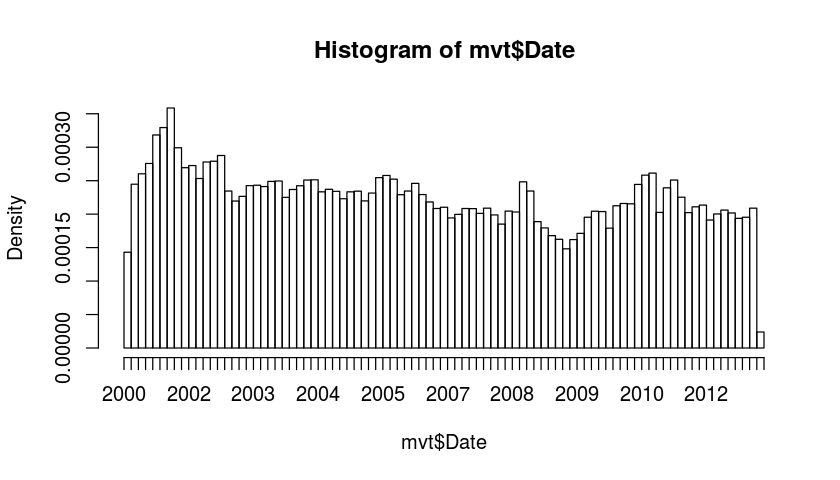

In [59]:
options(repr.plot.width=7, repr.plot.height=4)
hist(mvt$Date, breaks=100)

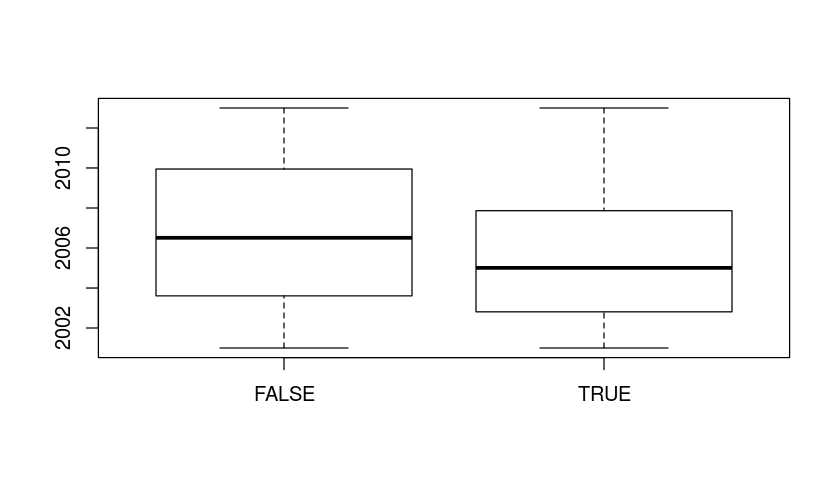

In [61]:
boxplot(mvt$Date ~ mvt$Arrest)

In [64]:
Year2001 = subset(mvt, Year == 2001)
table(Year2001$Arrest)


FALSE  TRUE 
18517  2152 

In [65]:
2152 / (2152 + 18517)

[1] 0.1041173

In [66]:
table(mvt$Arrest, mvt$Year)

       
         2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012
  FALSE 18517 16638 14859 15169 14956 14796 13068 13425 11327 14796 15012 13542
  TRUE   2152  2115  1798  1693  1528  1302  1212  1020   840   701   625   550

In [67]:
1212 / (1212 + 13068)

[1] 0.08487395

In [69]:
table(subset(mvt, Year == 2007)$Arrest)


FALSE  TRUE 
13068  1212 

In [70]:
550 / (550 + 13542)

[1] 0.03902924

In [107]:
#options(width=80)
sortedLocations = sort(table(mvt$LocationDescription), decreasing=T)
Top5Locations = as.list(names(sortedLocations)[1:6])[-3] # Exclude Other
Top5 = subset(mvt, LocationDescription %in% Top5Locations)
str(Top5)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 72 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "December" "December" "December" "December" ...
 $ Weekday            : chr  "Monday" "Monday" "Monda

In [110]:
Top5$LocationDescription = factor(Top5$LocationDescription)
table(Top5$LocationDescription, Top5$Arrest)

                                
                                  FALSE   TRUE
  ALLEY                            2059    249
  DRIVEWAY - RESIDENTIAL           1543    132
  GAS STATION                      1672    439
  PARKING LOT/GARAGE(NON.RESID.)  13249   1603
  STREET                         144969  11595

In [116]:
gas = subset(Top5, LocationDescription == 'GAS STATION')
sort(table(gas$Weekday))

Tuesday Wednesday    Monday  Thursday    Friday    Sunday  Saturday 
      270       273       280       282       332       336       338

In [117]:
table(Top5$LocationDescription, Top5$Weekday)

                                
                                 Friday Monday Saturday Sunday Thursday Tuesday
  ALLEY                             385    320      341    307      315     323
  DRIVEWAY - RESIDENTIAL            257    255      202    221      263     243
  GAS STATION                       332    280      338    336      282     270
  PARKING LOT/GARAGE(NON.RESID.)   2331   2128     2199   1936     2082    2073
  STREET                          23773  22305    22175  21756    22296   21888
                                
                                 Wednesday
  ALLEY                                317
  DRIVEWAY - RESIDENTIAL               234
  GAS STATION                          273
  PARKING LOT/GARAGE(NON.RESID.)      2103
  STREET                             22371